## ***Introduction - Tanitim***

***What is a time series analysis and what are the benefits?*** A time series analysis focuses on a series of data points ordered in time. This is one of the most widely used data science analyses and is applied in a variety of industries.

***Why Use Time Series Modeling?***
There are many ways to analyze data points that are ordered in time. One way is to simply put the data into a spreadsheet and use the built-in features to create a linear trendline and examine the slope to get the forecasted change. This is not a bad place to start since this approach results in a graph with a smooth line which gives you a general, visual sense of where things are headed.

But, the simple linear trend line tends to group the data in a way that blends together or leaves out a lot of interesting and important details that exist in the actual data.

Creating a time series model in Python allows you to capture more of the complexity of the data and includes all of the data elements that might be important. It also makes it possible to make adjustments to different measurements, tuning the model to make it potentially more accurate.

Of course, the predictive power of a model is not really known until we get the actual data to compare it to. Given that the Python modeling captures more of the data’s complexity, we would expect its predictions to be more accurate than a linear trendline.

***Zaman serisi analizi nedir ve faydaları nelerdir?*** Bir zaman serisi analizi, zaman içinde sıralanmış bir dizi veri noktasına odaklanır. Bu, en yaygın kullanılan veri bilimi analizlerinden biridir ve çeşitli endüstrilerde uygulanmaktadır.

***Neden Zaman Serisi Modellemesi Kullanılır?***
Zaman içinde sıralanan veri noktalarını analiz etmenin birçok yolu vardır. Bunun bir yolu, verileri basitçe bir elektronik tabloya koymak ve yerleşik özellikleri kullanarak doğrusal bir eğilim çizgisi oluşturmak ve öngörülen değişikliği elde etmek için eğimi incelemektir. Bu, başlamak için fena bir yer değil çünkü bu yaklaşım, size işlerin nereye gittiğine dair genel, görsel bir fikir veren düzgün bir çizgiye sahip bir grafikle sonuçlanır.

Ancak, basit doğrusal eğilim çizgisi, verileri birbirine karışacak veya gerçek verilerde bulunan birçok ilginç ve önemli ayrıntıyı dışarıda bırakacak şekilde gruplandırma eğilimindedir.

Python'da bir zaman serisi modeli oluşturmak, verilerin karmaşıklığının daha fazlasını yakalamanıza olanak tanır ve önemli olabilecek tüm veri öğelerini içerir. Ayrıca, farklı ölçümlerde ayarlamalar yapmayı, modeli potansiyel olarak daha doğru hale getirecek şekilde ayarlamayı mümkün kılar.

Tabii ki, bir modelin tahmin gücü, onu karşılaştırmak için gerçek verileri elde edene kadar gerçekten bilinmiyor. Python modellemesinin verilerin karmaşıklığının daha fazlasını yakaladığı göz önüne alındığında, tahminlerinin doğrusal bir eğilim çizgisinden daha doğru olmasını bekleriz.

### ***Import Packages***
### ***Paketleri İçe Aktar***

In [ ]:
import pandas as pd
import numpy as np
import warnings
import itertools
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

# Ignore the warning, can comment this
warnings.filterwarnings("ignore")

# For graphing purpose, can change
plt.style.use('seaborn-bright')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### ***Filling missing values with interpolation method.*** -
### ***Enterpolasyon yöntemi ile eksik değerlerin doldurulması.***

            orders  temperature  media_spend
date                                        
2020-05-02      54    18.270322          0.0
2020-05-03      63    19.882444          0.0
2020-05-04      56    16.878095          0.0
2020-05-05      65    21.878648          0.0
2020-05-06      64    21.112398          0.0
            orders_ffill  temperature_ffill  media_spend_ffill
date                                                          
2020-05-01           NaN                NaN                NaN
2020-06-01          71.0          11.728547          14.933721
2020-07-01          66.0          12.446668           0.000000
2020-08-01          70.0          23.823809           0.000000
2020-09-01          99.0          36.120670           0.000000
            orders_inter  temperature_inter  media_spend_inter
date                                                          
2020-05-01           NaN                NaN                NaN
2020-06-01          71.0          11.728547          14

<Axes: xlabel='date'>

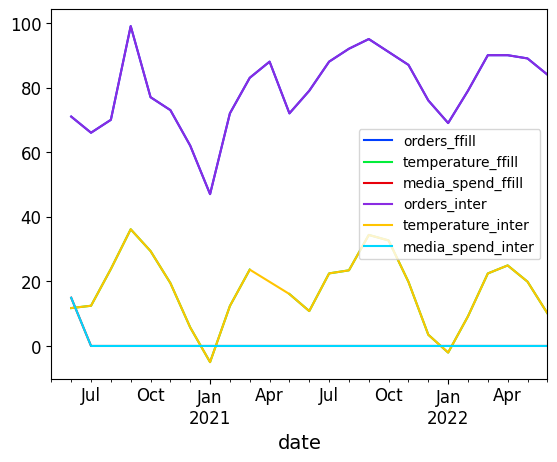

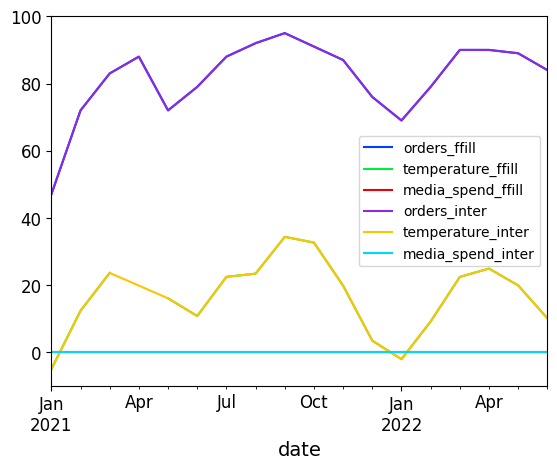

In [ ]:
dp = pd.read_csv("data.csv", parse_dates=["date"], index_col="date")
print(dp.head())
dp1 = dp.resample("MS").ffill().add_suffix("_ffill")
print(dp1.head())
dp2 = dp.resample("MS").interpolate().add_suffix("_inter")
print(dp2.head())
merged = pd.concat([dp1, dp2], axis=1)
merged.plot()
merged.loc["2021":].plot()

### ***Upload Data and Indexing with Time***
### ***Verileri Yükleme ve Zamanla İndeksleme***

In [ ]:
import pandas as pd
# Import the data
df = pd.read_csv("data.csv")
df['date'] = pd.to_datetime(df['date'])
# Set the date as index
df = df.set_index('date')
# Select the proper time period for Monthly aggreagation
df = df['2020-05-02':'2022-06-30'].resample('M').sum()
# Select the proper time period for Weekly Days aggreagation
df = df['2020-05-02':'2022-06-30'].resample('W').sum()
df.head(15)

,orders,temperature,media_spend
date,,,
2020-05-31,1820,536.823826,14.586841
2020-06-07,0,0.000000,0.000000
2020-06-14,0,0.000000,0.000000
2020-06-21,0,0.000000,0.000000
2020-06-28,0,0.000000,0.000000
2020-07-05,4666,376.952207,14.933721
2020-07-12,0,0.000000,0.000000
2020-07-19,0,0.000000,0.000000
2020-07-26,0,0.000000,0.000000


### ***Visulization the data*** - ***Verileri görselleştirme***

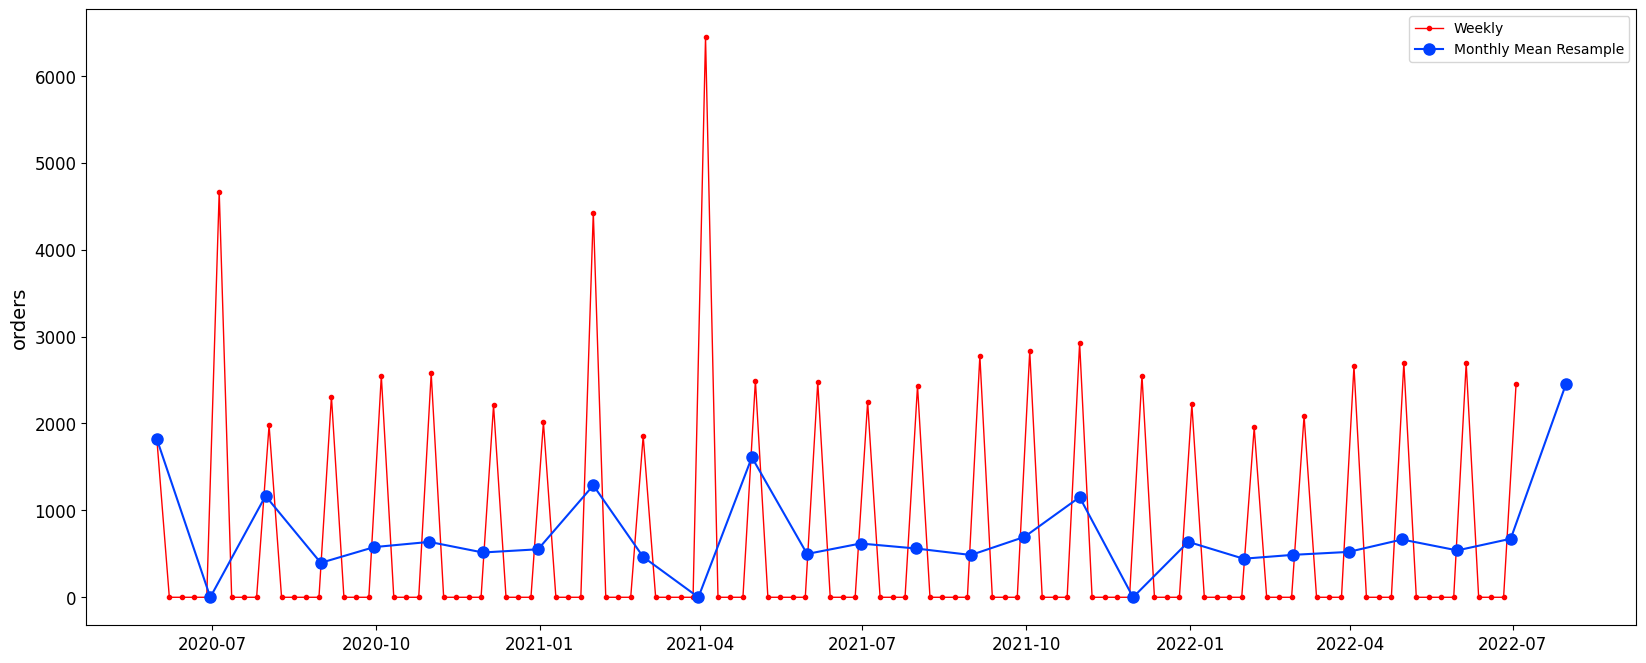

In [ ]:
import warnings
import matplotlib.pyplot as plt
y = df['orders']
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(y,marker='.', color= 'red', linestyle='-', linewidth=1, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('orders')
ax.legend();


### ***Decomposing the Data (Additive Model)- Verilerin Ayrıştırılması***

In [ ]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

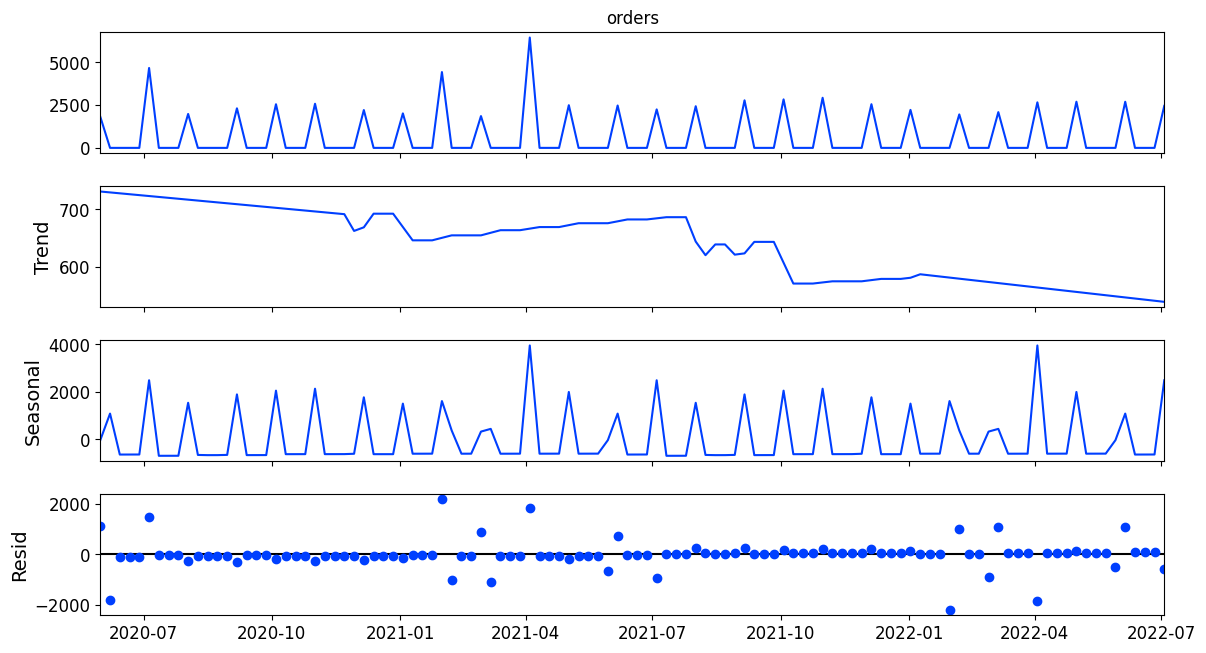

In [ ]:
seasonal_decompose(y)

### ***Decomposing the Data (Multiplicative Model)- Verilerin Ayrıştırılması***

In [ ]:
import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [ ]:
seasonal_decompose(y)

ValueError: ignored

### ***Checking Stationarity - Durağanlığın Kontrol Edilmesi***

### ***Visualization: Graphing the rolling statistics*** - **Görselleştirme: Dönen istatistiklerin grafiğini çizme**

In [ ]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):

    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

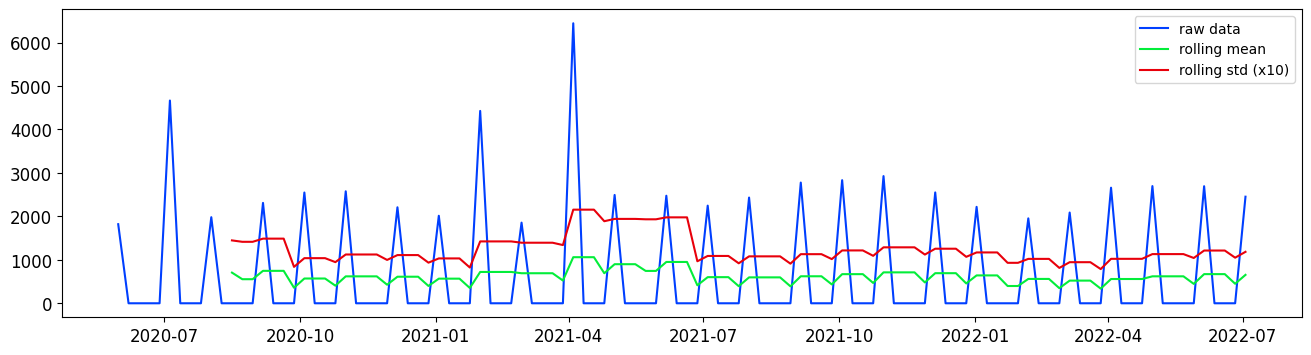

In [ ]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

### ***Augmented Dickey-Fuller Test - Artırılmış Dickey-Fuller Testi***

In [ ]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [ ]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -2.444
P-value = 0.130
Critical values :
	1%: -3.4996365338407074 - The data is not stationary with 99% confidence
	5%: -2.8918307730370025 - The data is not stationary with 95% confidence
	10%: -2.5829283377617176 - The data is not stationary with 90% confidence


### ***Detrending - Trendi Kaldirma***

This method removes the underlying trend in the time series:

Bu yöntem, zaman serisindeki temel eğilimi kaldırır:

 > Is the de-trended data stationary ?
Test statistic = -3.347
P-value = 0.013
Critical values :
	1%: -3.5087828609430614 - The data is not stationary with 99% confidence
	5%: -2.895783561573195 - The data is  stationary with 95% confidence
	10%: -2.5850381719848565 - The data is  stationary with 90% confidence


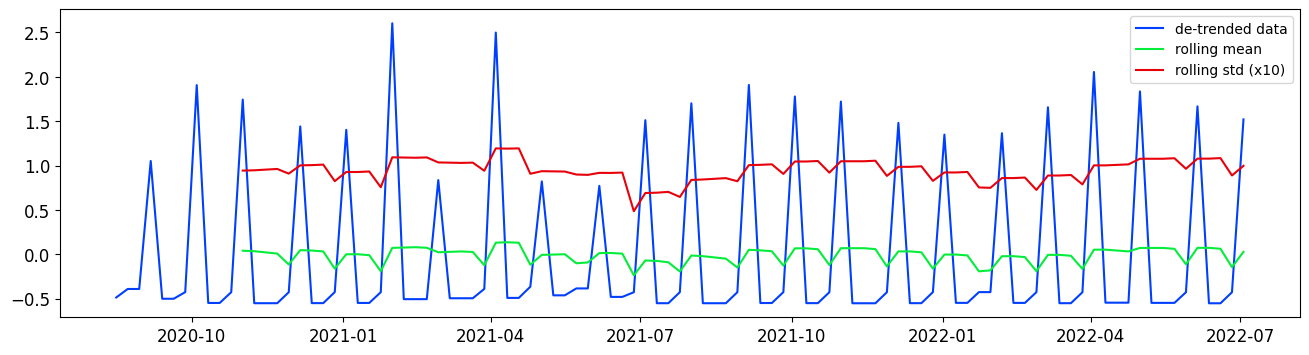

In [ ]:
# Detrending
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

### ***Differencing - Farklilastirma***

This method removes the underlying seasonal or cyclical patterns in the time series. Since the sample dataset has a 12-month seasonality, I used a 12-lag difference:

Bu yöntem, zaman serilerinde altta yatan mevsimsel veya döngüsel kalıpları kaldırır. Örnek veri kümesinin 12 aylık bir mevsimselliği olduğundan, 12 gecikmeli bir fark kullandım:

 > Is the 12 lag differenced data stationary ?
Test statistic = -2.274
P-value = 0.180
Critical values :
	1%: -3.5097356063504983 - The data is not stationary with 99% confidence
	5%: -2.8961947486260944 - The data is not stationary with 95% confidence
	10%: -2.5852576124567475 - The data is not stationary with 90% confidence


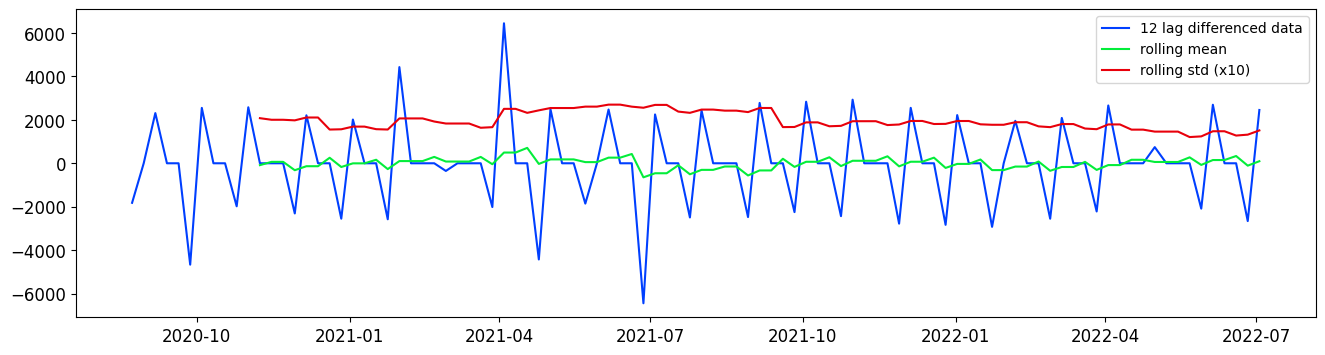

In [ ]:
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag,'12 lag differenced data')
ADF_test(y_12lag,'12 lag differenced data')

### ***Combining Detrending and Differencing - Trendden Uzaklaştırma ve Farklılaştırmayı Birleştirme***

This approach uses both methods to stationarize the data.

Bu yaklaşım, verileri durağanlaştırmak için her iki yöntemi de kullanır.

 > Is the 12 lag differenced de-trended data stationary ?
Test statistic = -3.340
P-value = 0.013
Critical values :
	1%: -3.520713130074074 - The data is not stationary with 99% confidence
	5%: -2.9009249540740742 - The data is  stationary with 95% confidence
	10%: -2.5877813777777776 - The data is  stationary with 90% confidence


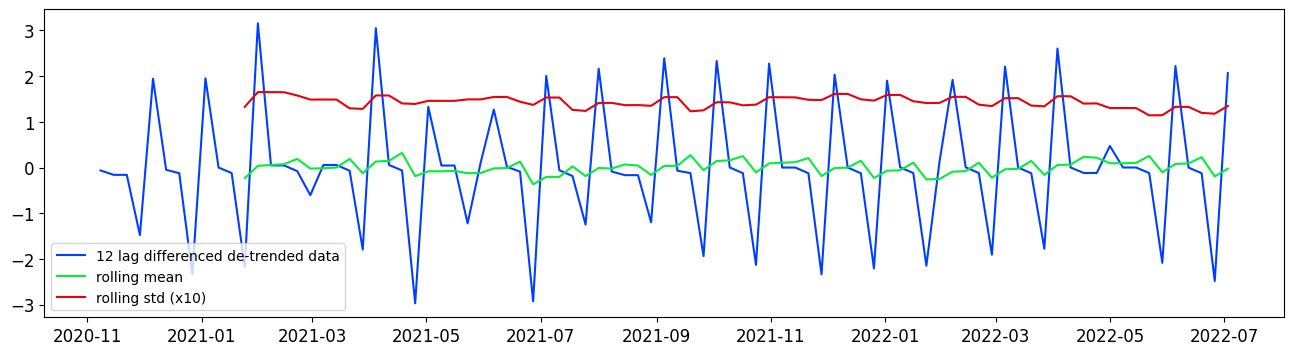

In [ ]:
# Detrending + Differencing

y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend,'12 lag differenced de-trended data')
ADF_test(y_12lag_detrend,'12 lag differenced de-trended data')

### ***Set the y_to_train, y_to_test, and the length of predict units***
### ***y_to_train, y_to_test ve tahmin birimlerinin uzunluğunu ayarlayın***

In [ ]:
y_to_train = y[:'2022-01-30'] # dataset to train
y_to_val = y['2022-02-06':] # last 6 months for test
predict_date = len(y) - len(y[:'2021-02-06']) # the number of data points for the test set

# ***Time Series Prediction Models***

### ***SARIMA Model***

SARIMA includes various parameters that can be adjusted to achieve the best performance.

Trend Elements:

p: Trend autoregression order.
d: Trend difference order.
q: Trend moving average order.
Seasonal Elements:

P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

In order to get the best prediction, it’s important to find the values of SARIMA(p,d,q)(P,D,Q)m that optimize a metric of interest

Trend Unsurları:

p: Trend otoregresyon sırası.
d: Trend farkı sırası.
q: Trend hareketli ortalama sırası.
Mevsimsel Öğeler:

P: Mevsimsel otoregresif düzen.
D: Mevsim farkı sıralaması.
S: Mevsimsel hareketli ortalama düzeni.
m: Tek bir mevsimsel dönem için zaman adımı sayısı.

En iyi tahmini elde etmek için, ilgilenilen bir metriği optimize eden SARIMA(p,d,q)(P,D,Q)m değerlerini bulmak önemlidir.

**The evaluation metric we’ll use for the grid search is the AIC (Akaike Information Criterion) value. The AIC measures how well a model fits the data while taking into account the overall complexity of the model. In general, we want to pick the combination with the lowest AIC value.**

*Izgara araması için kullanacağımız değerlendirme ölçütü AIC (Akaike Information Criterion) değeridir. AIC, modelin genel karmaşıklığını hesaba katarak bir modelin verilere ne kadar iyi uyduğunu ölçer. Genel olarak, en düşük AIC değerine sahip kombinasyonu seçmek istiyoruz.*

In [ ]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]

    mini = float('+inf')


    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()

                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [ ]:
sarima_grid_search(y,14)

The set of parameters with the minimum AIC is: SARIMA(1, 0, 1)x(0, 1, 1, 14) - AIC:1378.3295533501582


In [ ]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])

    results.plot_diagnostics(figsize=(16, 8))
    plt.show()

    # The dynamic=False argument ensures that we produce one-step ahead forecasts,
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The RMSE of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts.
    # In this case, we only use information from the time series up to a certain point,
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()

    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2319      0.162      1.435      0.151      -0.085       0.549
ma.L1         -0.7711      0.115     -6.717      0.000      -0.996      -0.546
ma.S.L14      -1.0000      0.096    -10.407      0.000      -1.188      -0.812
sigma2      1.258e+06   7.64e-08   1.65e+13      0.000    1.26e+06    1.26e+06


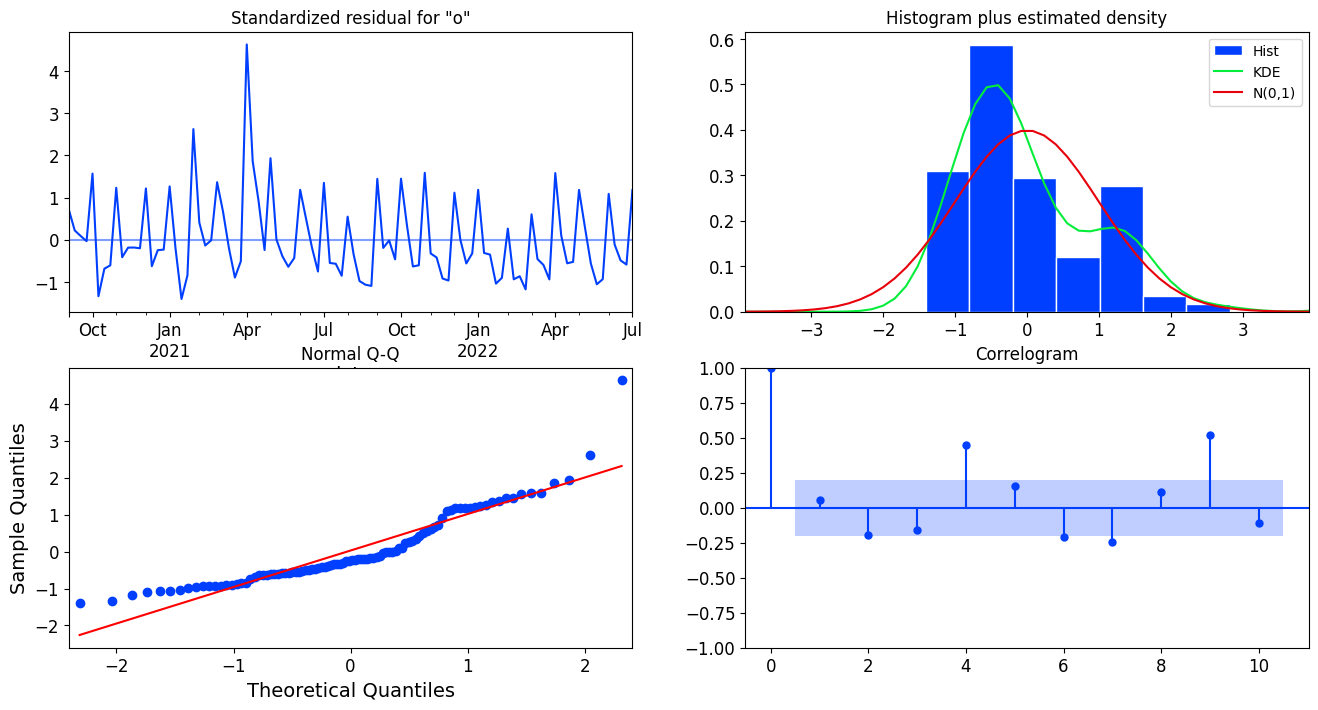

The RMSE of SARIMA with season_length=14 and dynamic = False 988.85


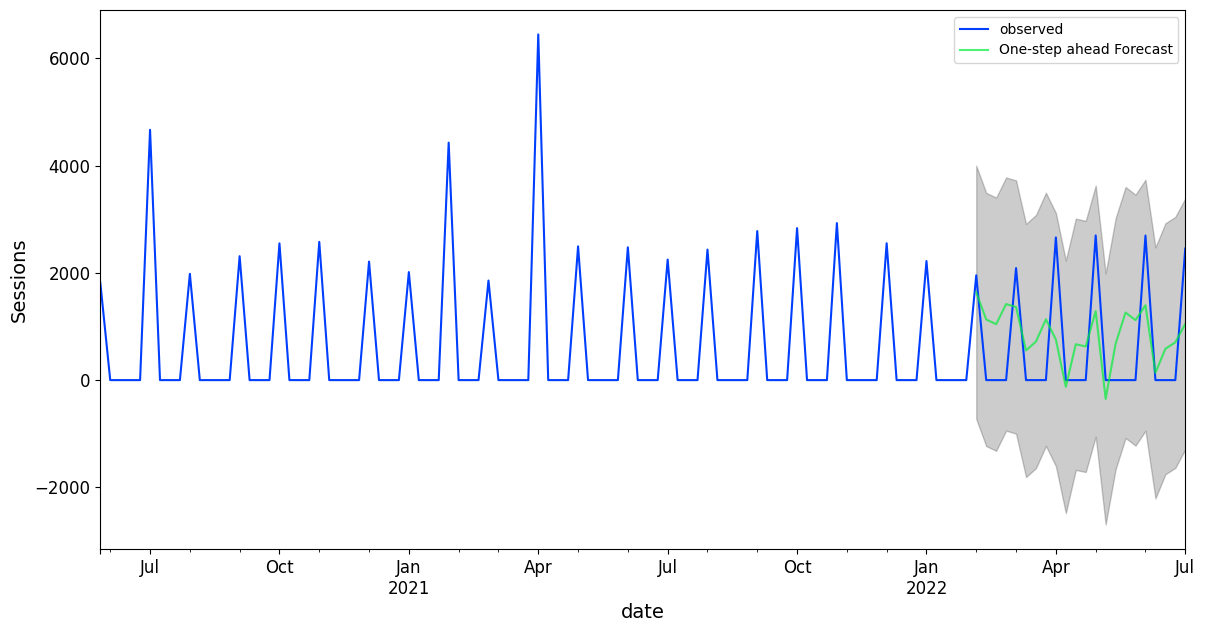

The Root Mean Squared Error of SARIMA with season_length=14 and dynamic = True 1141.3


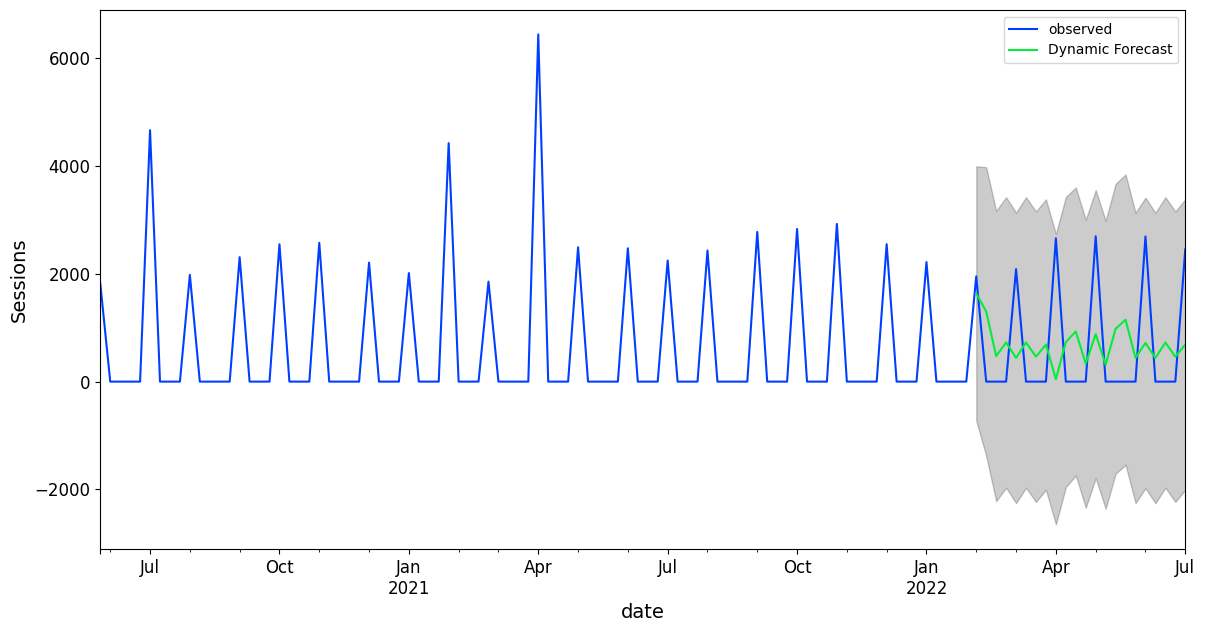

In [ ]:

model = sarima_eva(y,(1, 0, 1),(0, 1, 1, 14),14,'2022-02-06',y_to_val)

1. The top left plot shows the residuals over time. We do not want to see any obvious seasonality here and the messier it is, the better we can say we found the trend and seasonality in our data and removed the noise.

2. In the top-right plot, we want to see that the red KDE line follows closely with the N(0,1) line to indicate that the residuals are normally distributed. This line is the standard notation for a normal distribution with a mean of 0 and a standard deviation of 1.

3. In the bottom left qq-plot, you see the ordered distribution of residuals (blue dots) following the linear trend (red line) of the samples taken from a standard normal distribution with N(0, 1).

4. The autocorrelation visual (called a “correlogram”) on the bottom right shows that the time series residuals have a low correlation with the lagged versions of itself (that is, the majority of dots fall into the blue shaded area).


*1. Sol üstteki çizim, zaman içindeki artıkları gösterir. Burada bariz bir mevsimsellik görmek istemiyoruz ve ne kadar dağınıksa, trendi ve mevsimselliği verilerimizde bulduğumuzu ve gürültüyü kaldırdığımızı o kadar iyi söyleyebiliriz.*

*2. Sağ üstteki çizimde, artıkların normal dağıldığını belirtmek için kırmızı KDE çizgisinin N(0,1) çizgisini yakından takip ettiğini görmek istiyoruz. Bu satır, ortalaması 0 ve standart sapması 1 olan normal bir dağılımın standart notasyonudur.*

*3. Sol alttaki qq grafiğinde, N(0, 1) ile standart bir normal dağılımdan alınan örneklerin lineer eğilimini (kırmızı çizgi) izleyen artıkların (mavi noktalar) sıralı dağılımını görüyorsunuz.*

*4. Sağ alt kısımdaki otokorelasyon görseli (“korrelogram” olarak adlandırılır), zaman serisi artıklarının kendisinin gecikmeli versiyonları ile düşük bir korelasyona sahip olduğunu gösterir (yani, noktaların çoğu mavi gölgeli alana düşer).*

*Yukarıdaki dört noktanın hepsini doğrulayarak, bu modelin artıklarının normale yakın dağıldığı sonucuna varabiliriz. Bu, veri setimiz için uygun bir model bulduğumuzu gösterir.*

In [ ]:
def forecast(model,predict_steps,y):

    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()

    # Produce the forcasted tables
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('date'), on='date')

    return (final_table)

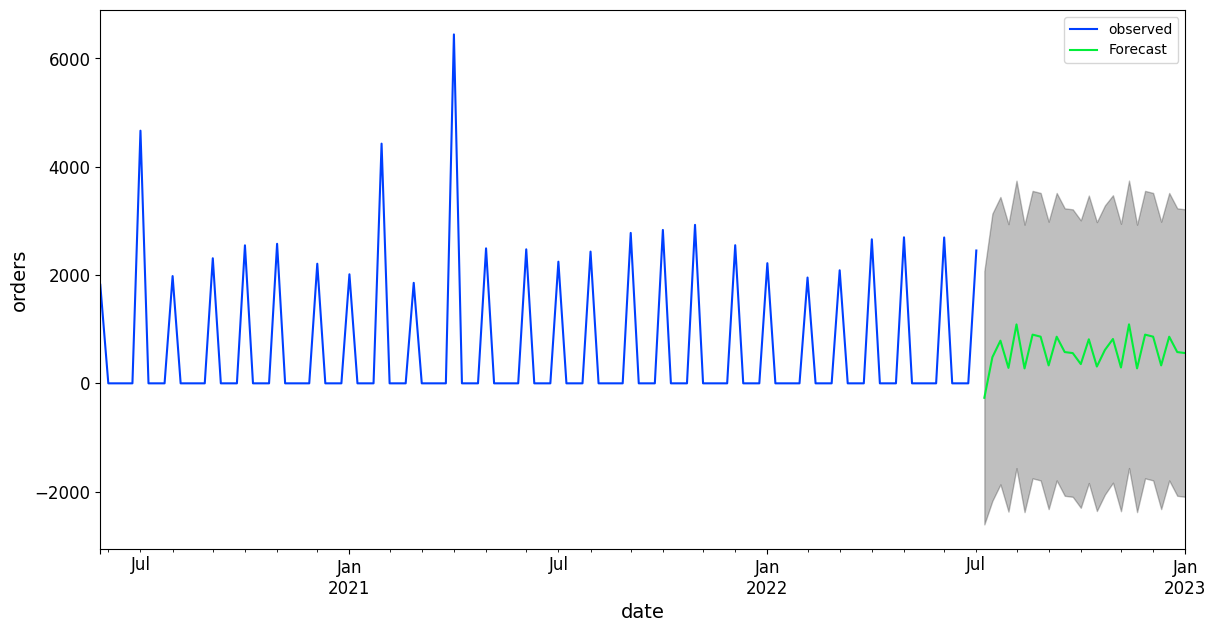

,date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-07-10,-266.86232851,-2605.68216663,2071.95750961
1,2022-07-17,482.51597389,-2170.51300764,3135.54495543
2,2022-07-24,788.05608274,-1865.93093094,3442.04309643
3,2022-07-31,285.25854214,-2369.32820359,2939.84528788
4,2022-08-07,1088.34700895,-1566.22527218,3742.91929008


In [ ]:
final_table = forecast(model,26,y)
final_table.head()

**Grafikteki yeşil çizgi, oluşturduğumuz tahmin modeline dayalı olarak gelecekte beklenen verileri temsil eder. Yeşil çizgi, her hafta için ortalama tahmini değeri temsil ediyor ve gerçek sayıların büyük ölçüde bu çizgiyi izlediğini görmek bizi şaşırtmaz. Ama bunun garantisi yok!

Yeşil çizginin üstündeki ve altındaki gri alan, yüzde 95 güven aralığını temsil eder ve neredeyse tüm tahmin modellerinde olduğu gibi, tahminler geleceğe doğru ilerledikçe değerlerimize olan güvenimiz o kadar azalır. Bu durumda, gerçek satışların bu aralığın içinde olacağından yüzde 95 eminiz. Ancak gerçeklerin bu aralığın tamamen dışında kalma ihtimali de var. Tahmin etmek istediğimiz gelecek zaman aralığı ne kadar büyük olursa, bu güven aralığı o kadar geniş olacaktır (yani, tahminimiz o kadar kesin değildir)**



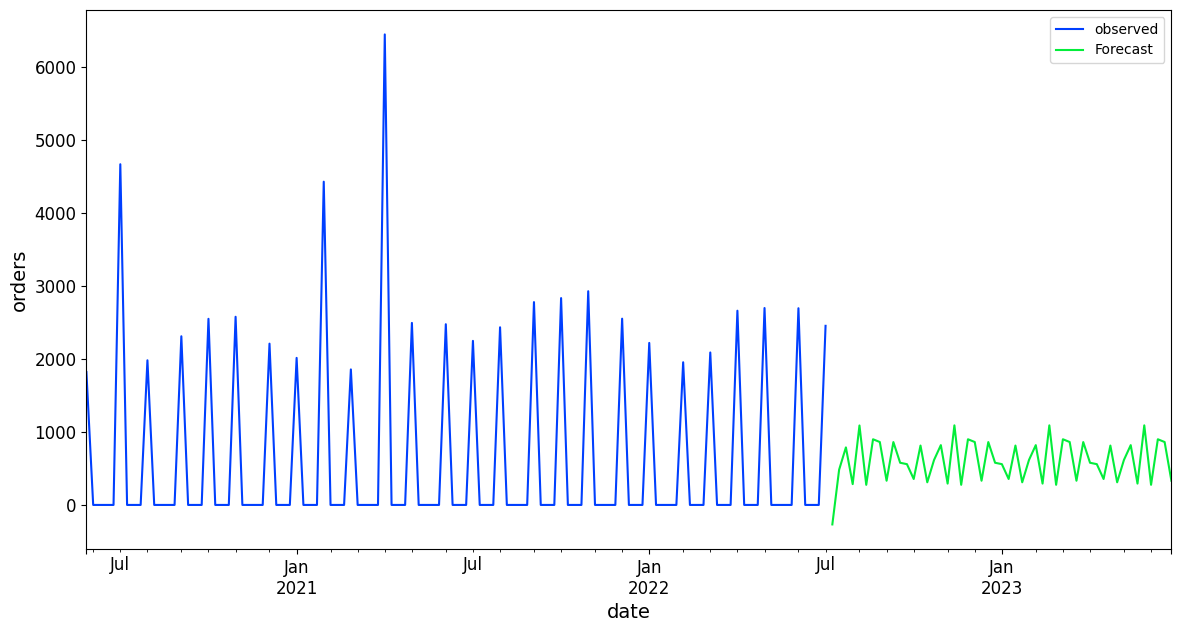

In [ ]:
### Graphs without the confident interval
pred_uc = model.get_forecast(steps=51)
ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('date')
ax.set_ylabel(y.name)

plt.legend()
plt.show()

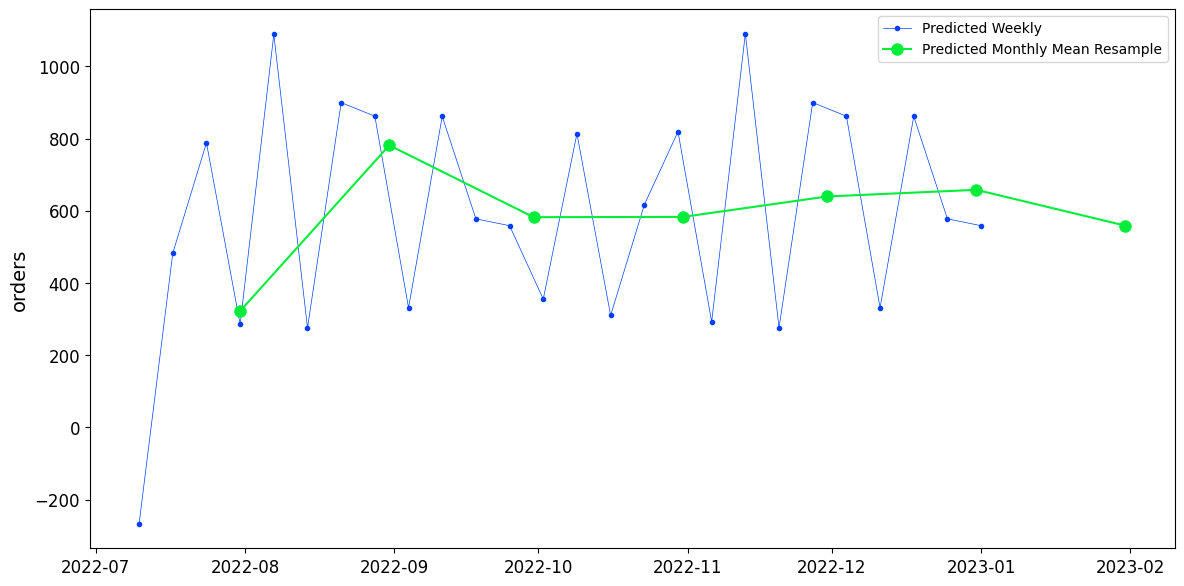

In [ ]:
### Graphs show only the perdiected period
final_table.index = final_table.date
fig, ax = plt.subplots( figsize=(14, 7))
# ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(final_table.Predicted_Mean,marker='.', linestyle='-', linewidth=0.5, label='Predicted Weekly')
# ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(final_table.Predicted_Mean.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Predicted Monthly Mean Resample')
ax.set_ylabel('orders')
ax.legend();

***Hosting an API endpoint for your fitted model*** allows you to expose your machine learning model's capabilities over the internet, so that other applications and users can interact with it using HTTP requests. This is commonly done through a process called "API deployment." Here's a high-level overview of the steps involved in hosting an API endpoint for your fitted model:

1. **Choose a Hosting Platform**: There are several cloud platforms that offer services for deploying and hosting machine learning models as APIs. Some popular options include Amazon Web Services (AWS), Microsoft Azure, Google Cloud Platform (GCP), and Heroku. Choose the platform that aligns with your preferences and requirements.

2. **Create an API Application**: Set up a new application or project on your chosen hosting platform. This could involve creating a new virtual machine, container instance, or serverless function, depending on the platform's offerings.

3. **Deploy Your Model**: Upload your fitted machine learning model along with any necessary files (such as preprocessing scripts or weights) to the hosting environment.

4. **API Framework**: Choose an API framework or library that facilitates the creation of API endpoints. Popular choices include Flask, Django (Python frameworks), Express (Node.js), and FastAPI (Python). These frameworks help you define routes and handle incoming requests.

5. **Define API Endpoint**: Define the endpoint(s) through which users can send requests to your model. For example, you might create an endpoint that accepts POST requests containing input data for your model's predictions.

6. **Load and Use the Model**: In your API endpoint code, load your pre-trained model (which you've uploaded in Step 4) and use it to make predictions on incoming data. Make sure to handle any necessary preprocessing and post-processing steps.

7. **Input Validation and Sanitization**: Validate and sanitize incoming requests to ensure they meet your API's requirements and prevent malicious inputs from affecting your system.

8. **Response Formatting**: Format the model's predictions into a suitable response format, often in JSON or XML.

9. **Security**: Implement security measures to protect your API from unauthorized access and potential attacks. This might include using authentication mechanisms and setting up HTTPS.

10. **Scalability**: Ensure that your deployed API can handle different levels of traffic by considering scalability options provided by your hosting platform.

11. **Monitoring and Logging**: Set up logging and monitoring to track the performance and usage of your API. This can help you identify issues and optimize performance over time.

12. **Testing**: Thoroughly test your API endpoint using sample requests to ensure that it's functioning as expected.

13. **Documentation**: Create clear and comprehensive documentation for your API, explaining how users can make requests, what inputs are required, and how to interpret the responses.

14. **Launch**: Once everything is set up, launch your API endpoint for public access.

Remember that hosting and managing an API endpoint involves ongoing maintenance, updates, and monitoring to ensure reliability, security, and optimal performance.

***Uyumlu modeliniz için bir API uç noktası barındırmak***, makine öğrenimi modelinizin yeteneklerini internet üzerinden açığa çıkarmanıza olanak tanır, böylece diğer uygulamalar ve kullanıcılar HTTP isteklerini kullanarak modelinizle etkileşime girebilir. Bu genellikle "API dağıtımı" adı verilen bir süreçle yapılır. Burada, uygun modeliniz için bir API uç noktası barındırmaya ilişkin adımlara üst düzey bir genel bakış yer almaktadır:

1. **Bir Barındırma Platformu Seçin**: Makine öğrenimi modellerini API olarak dağıtmak ve barındırmak için hizmetler sunan çeşitli bulut platformları vardır. Bazı popüler seçenekler arasında Amazon Web Services (AWS), Microsoft Azure, Google Cloud Platform (GCP) ve Heroku bulunmaktadır. Tercihlerinize ve gereksinimlerinize uygun platformu seçin.

2. **Bir API Uygulaması Oluşturun**: Seçtiğiniz barındırma platformunda yeni bir uygulama veya proje kurun. Bu, platformun sunduklarına bağlı olarak yeni bir sanal makine, konteyner örneği veya sunucusuz işlev oluşturmayı içerebilir.

3. **Modelinizi Dağıtın**: Hazır makine öğrenimi modelinizi gerekli dosyalarla (ön işleme komut dosyaları veya ağırlıklar gibi) birlikte barındırma ortamına yükleyin.

4. **API Çerçevesi**: API uç noktalarının oluşturulmasını kolaylaştıran bir API çerçevesi veya kütüphanesi seçin. Popüler seçenekler arasında Flask, Django (Python çerçeveleri), Express (Node.js) ve FastAPI (Python) bulunmaktadır. Bu çerçeveler rotaları tanımlamanıza ve gelen istekleri işlemenize yardımcı olur.

5. **API Uç Noktasını Tanımlayın**: Kullanıcıların modelinize istek gönderebileceği uç noktaları tanımlayın. Örneğin, modelinizin tahminleri için girdi verilerini içeren POST isteklerini kabul eden bir uç nokta oluşturabilirsiniz.

6. **Modeli Yükleyin ve Kullanın**: API uç noktası kodunuzda, önceden eğitilmiş modelinizi (Adım 4'te yüklediğiniz) yükleyin ve gelen veriler üzerinde tahminler yapmak için kullanın. Gerekli ön işleme ve son işleme adımlarını gerçekleştirdiğinizden emin olun.

7. **Girdi Doğrulama ve Temizleme**: API'nizin gereksinimlerini karşıladıklarından emin olmak ve kötü niyetli girdilerin sisteminizi etkilemesini önlemek için gelen istekleri doğrulayın ve sterilize edin.

8. **Yanıt Biçimlendirme**: Modelin tahminlerini, genellikle JSON veya XML olarak uygun bir yanıt biçiminde biçimlendirin.

9. **Güvenlik**: API'nizi yetkisiz erişimden ve olası saldırılardan korumak için güvenlik önlemleri uygulayın. Bu, kimlik doğrulama mekanizmalarının kullanılmasını ve HTTPS kurulumunu içerebilir.

10. **Ölçeklenebilirlik**: Barındırma platformunuz tarafından sağlanan ölçeklenebilirlik seçeneklerini göz önünde bulundurarak dağıtılan API'nizin farklı trafik seviyelerini kaldırabileceğinden emin olun.

11. **İzleme ve Günlüğe Kaydetme**: API'nizin performansını ve kullanımını izlemek için günlük kaydı ve izleme ayarlayın. Bu, sorunları belirlemenize ve zaman içinde performansı optimize etmenize yardımcı olabilir.

12. **Test etme**: Beklendiği gibi çalıştığından emin olmak için örnek istekleri kullanarak API uç noktanızı iyice test edin.

13. **Dokümantasyon**: API'niz için kullanıcıların nasıl istekte bulunabileceğini, hangi girdilerin gerekli olduğunu ve yanıtların nasıl yorumlanacağını açıklayan net ve kapsamlı belgeler oluşturun.

14. **Başlat**: Her şey ayarlandıktan sonra, API uç noktanızı genel erişim için başlatın.

Bir API uç noktasını barındırmanın ve yönetmenin güvenilirlik, güvenlik ve optimum performans sağlamak için sürekli bakım, güncelleme ve izleme gerektirdiğini unutmayın.

### ***1. Flask Kurulumu:***
Öncelikle Flask'ı yüklemek için aşağıdaki komutu kullanarak Python ortamına Flask kütüphanesini ekledim:

In [ ]:
pip install Flask

In [ ]:
# hello.py

from flask import Flask

app = Flask(__name__)

@app.route("/")
def hello_world():
    return "Hello, World!"

In [ ]:
pip install pipenv


### ***2. Proje Dizini Oluşturma:***
Bir proje dizini oluşturmak icingerekli dosyaları yerleştirdim. Örneğin:

In [ ]:
from flask import Flask, jsonify

app = Flask(__name__)

# Örnek veri
tasks = [
    {
        'id': 1,
        'title': 'Görev 1',
        'done': False
    },
    {
        'id': 2,
        'title': 'Görev 2',
        'done': True
    }
]

@app.route('/api/tasks', methods=['GET'])
def get_tasks():
    return jsonify({'tasks': tasks})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


### ***3. app.py Dosyasını Oluşturma:***
Bu dosya Flask uygulamanızın ana dosyası olacak. İşte basit bir örnek:

In [ ]:
from flask import Flask, request, jsonify
from model import generate_forecasts

app = Flask(__name__)

@app.route('/forecast/date_interval', methods=['POST'])
def forecast_by_date_interval():
    data = request.json
    start_date = data['start_date']
    end_date = data['end_date']
    forecasts = generate_forecasts(start_date, end_date)  # Implement your forecasting logic
    return jsonify({'forecasts': forecasts})

@app.route('/forecast/forecast_horizon', methods=['POST'])
def forecast_by_horizon():
    data = request.json
    horizon = data['forecast_horizon']
    forecasts = generate_forecasts_for_horizon(horizon)  # Implement your forecasting logic
    return jsonify({'forecasts': forecasts})

if __name__ == '__main__':
    app.run(debug=True)

ModuleNotFoundError: ignored

### ***4. model.py Dosyasını Oluşturma:***
Bu dosya, tahmin modelinin bulunduğu yer olacak. Tahmin mantığı burada uygulanacaktır.

In [ ]:
# model.py

def generate_forecasts(start_date, end_date):
    # Implement your forecasting logic here based on the date interval
    forecasts = [...]  # Your generated forecasts
    return forecasts

def generate_forecasts_for_horizon(horizon):
    # Implement your forecasting logic here based on the forecast horizon
    forecasts = [...]  # Your generated forecasts
    return forecasts

### ***5. API Çalıştırma:***
Komut satırına giderek aşağıdaki komutu çalıştırın:

In [ ]:
python app.py